In [156]:
from sklearn.datasets import make_classification
import numpy as np

In [157]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

In [158]:
def train_test_split(X, y, test_size=0.2, random_state=None):

    # Convert to numpy arrays if not already
    X = np.array(X)
    y = np.array(y)

    # Get number of samples
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    # Create indices and shuffle
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Split indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    # Split the data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w = [1,1]
b = 1

# initialize loss history
loss_history = np.array([])

# number of iterations
iters = 40

for i in range(iters):
    #forward pass
    
    # Logistic Regression
    z = X_train @ w + b
    
    # sigmoid function
    yhat_train = 1/(1+np.exp(-z))
    
    # loss function
    L_i = -(Y_train * np.log(yhat_train) + (1-Y_train) * np.log(1-yhat_train))
    
    # # average loss
    J = (1/len(Y_train)) * np.sum(L_i)
    
    
    # update loss history
    loss_history = np.append(loss_history, J)
    
    
    #backward pass
    
    # gradient of loss function
    dw = (1/len(Y_train)) * X_train.T @ (yhat_train - Y_train)
    db = (1/len(Y_train)) * np.sum(yhat_train - Y_train)
    
    # update parameters
    w = w - 0.1 * dw
    b = b - 0.1 * db

# z_test
z_test = X_test @ w + b

# yhat_test
yhat_test = 1/(1+np.exp(-z_test))

#predictions
predictions = (yhat_test > 0.5).astype(int)

# accuracy
accuracy = np.mean(predictions == Y_test)

print(f"yhat_test: {np.round(yhat_test[:10], 2)}")

print(f"predictions: {predictions[:10]}")

print(f"Y_test: {Y_test[:10]}")

print(f"Accuracy: {accuracy}\n")


print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape},Y_train.shape: {Y_train.shape},Y_test.shape: {Y_test.shape},z.shape: {z.shape}, yhat_train.shape: {yhat_train.shape}")
print()
print(f"X_train[:3]:\n {X_train[:3]}")
print()
print(f"z[:10]:\n {z[:3]}\n")
print(f"L_i[:3]:\n {L_i[:3]}\n")
print (f"J: {J}\n")
print(f"dw: {dw}\n")
print(f"db: {db}\n")

print(f"yhat_train[:3]: {yhat_train[:3]}, ")

print(yhat_train[:3])



yhat_test: [0.08 0.09 0.36 0.18 0.23 0.95 0.14 0.89 0.39 0.93]
predictions: [0 0 0 0 0 1 0 1 0 1]
Y_test: [0 0 0 0 0 1 0 1 0 1]
Accuracy: 0.945

X_train.shape: (800, 2), X_test.shape: (200, 2),Y_train.shape: (800,),Y_test.shape: (200,),z.shape: (800,), yhat_train.shape: (800,)

X_train[:3]:
 [[ 1.61575554 -0.49876574]
 [-1.07776524 -1.83328251]
 [ 1.12337431  0.7441727 ]]

z[:10]:
 [-0.42063631 -2.46095305  1.55265501]

L_i[:3]:
 [0.50478473 0.0819058  0.19201212]

J: 0.32297381285693344

dw: [ 0.07543726 -0.09094917]

db: 0.04149114100709895

yhat_train[:3]: [0.3963645  0.07864125 0.82529687], 
[0.3963645  0.07864125 0.82529687]


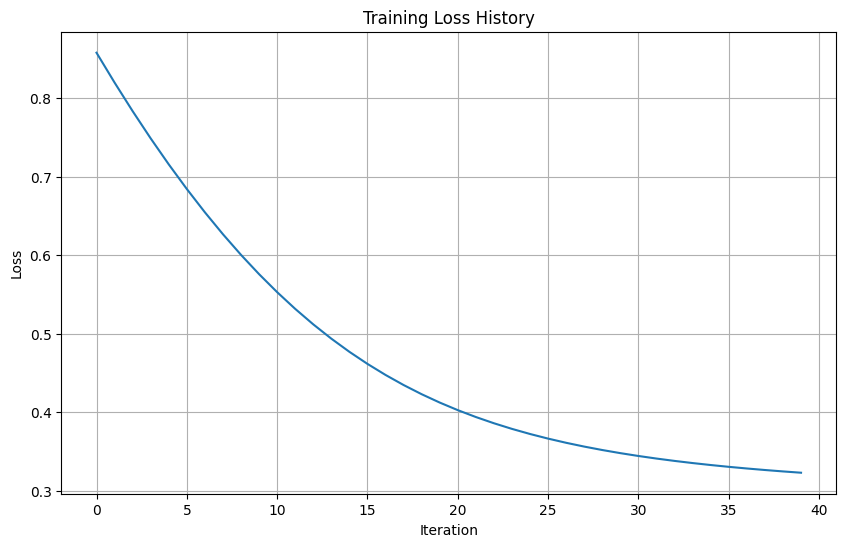

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.grid(True)
plt.show()